# Load dataset

In [1]:
import numpy as np
import seaborn as sb
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
dataset = read_csv('wine quality.csv')

# Analyze Data

In [3]:
dataset.shape

(6497, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
dataset.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
dataset.skew()

fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [9]:
dataset['fixed acidity'] = dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean())
dataset['volatile acidity'] = dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean())
dataset['citric acid'] = dataset['citric acid'].fillna(dataset['citric acid'].mode()[0])
dataset['residual sugar'] = dataset['residual sugar'].fillna(dataset['residual sugar'].mode()[0])
dataset['chlorides'] = dataset['chlorides'].fillna(dataset['chlorides'].mean())
dataset['pH'] = dataset['pH'].fillna(dataset['pH'].mean())
dataset['sulphates'] = dataset['sulphates'].fillna(dataset['sulphates'].mean())

In [10]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Visualizations

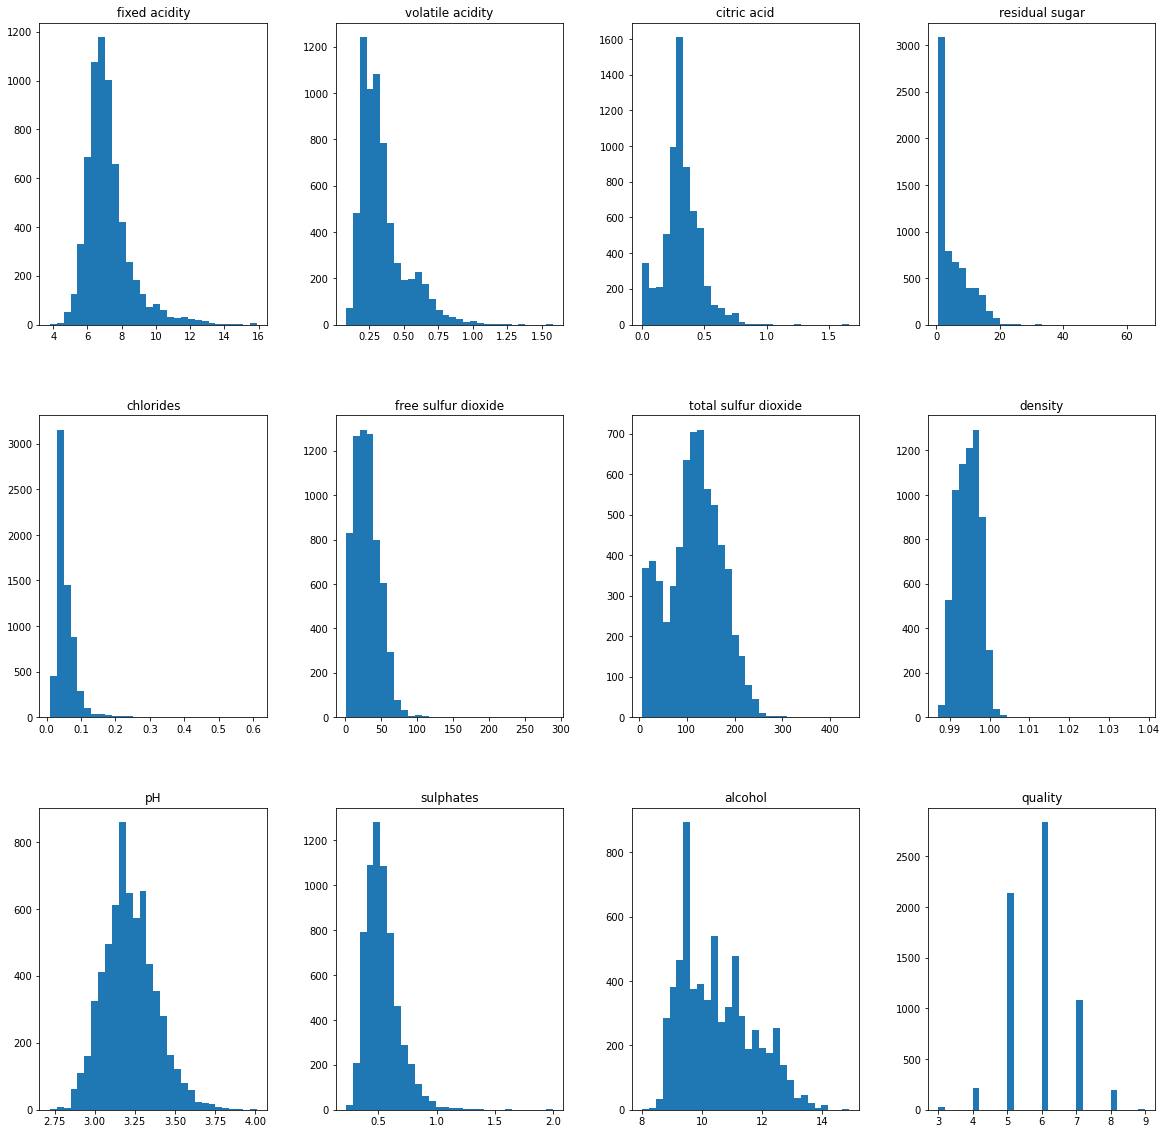

In [11]:
dataset.hist(figsize=(20,20), grid=False, layout=(3, 4), bins=30)
pyplot.show()

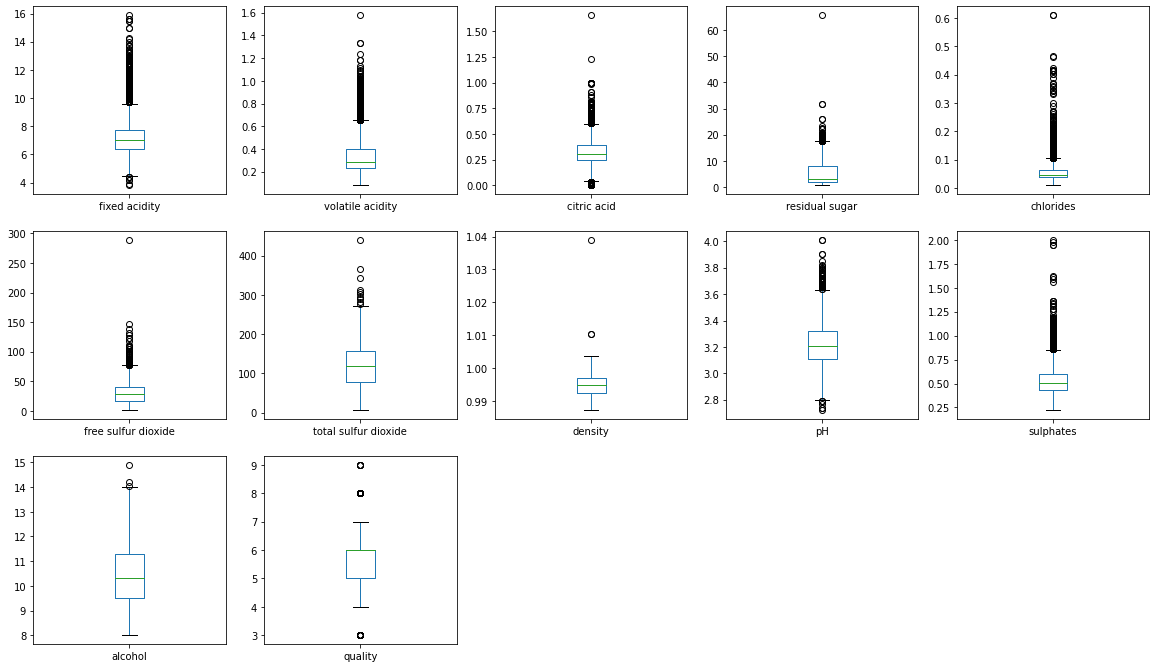

In [12]:
dataset.plot(kind="box",subplots=True,layout=(5,5),figsize=(20,20))
pyplot.show()

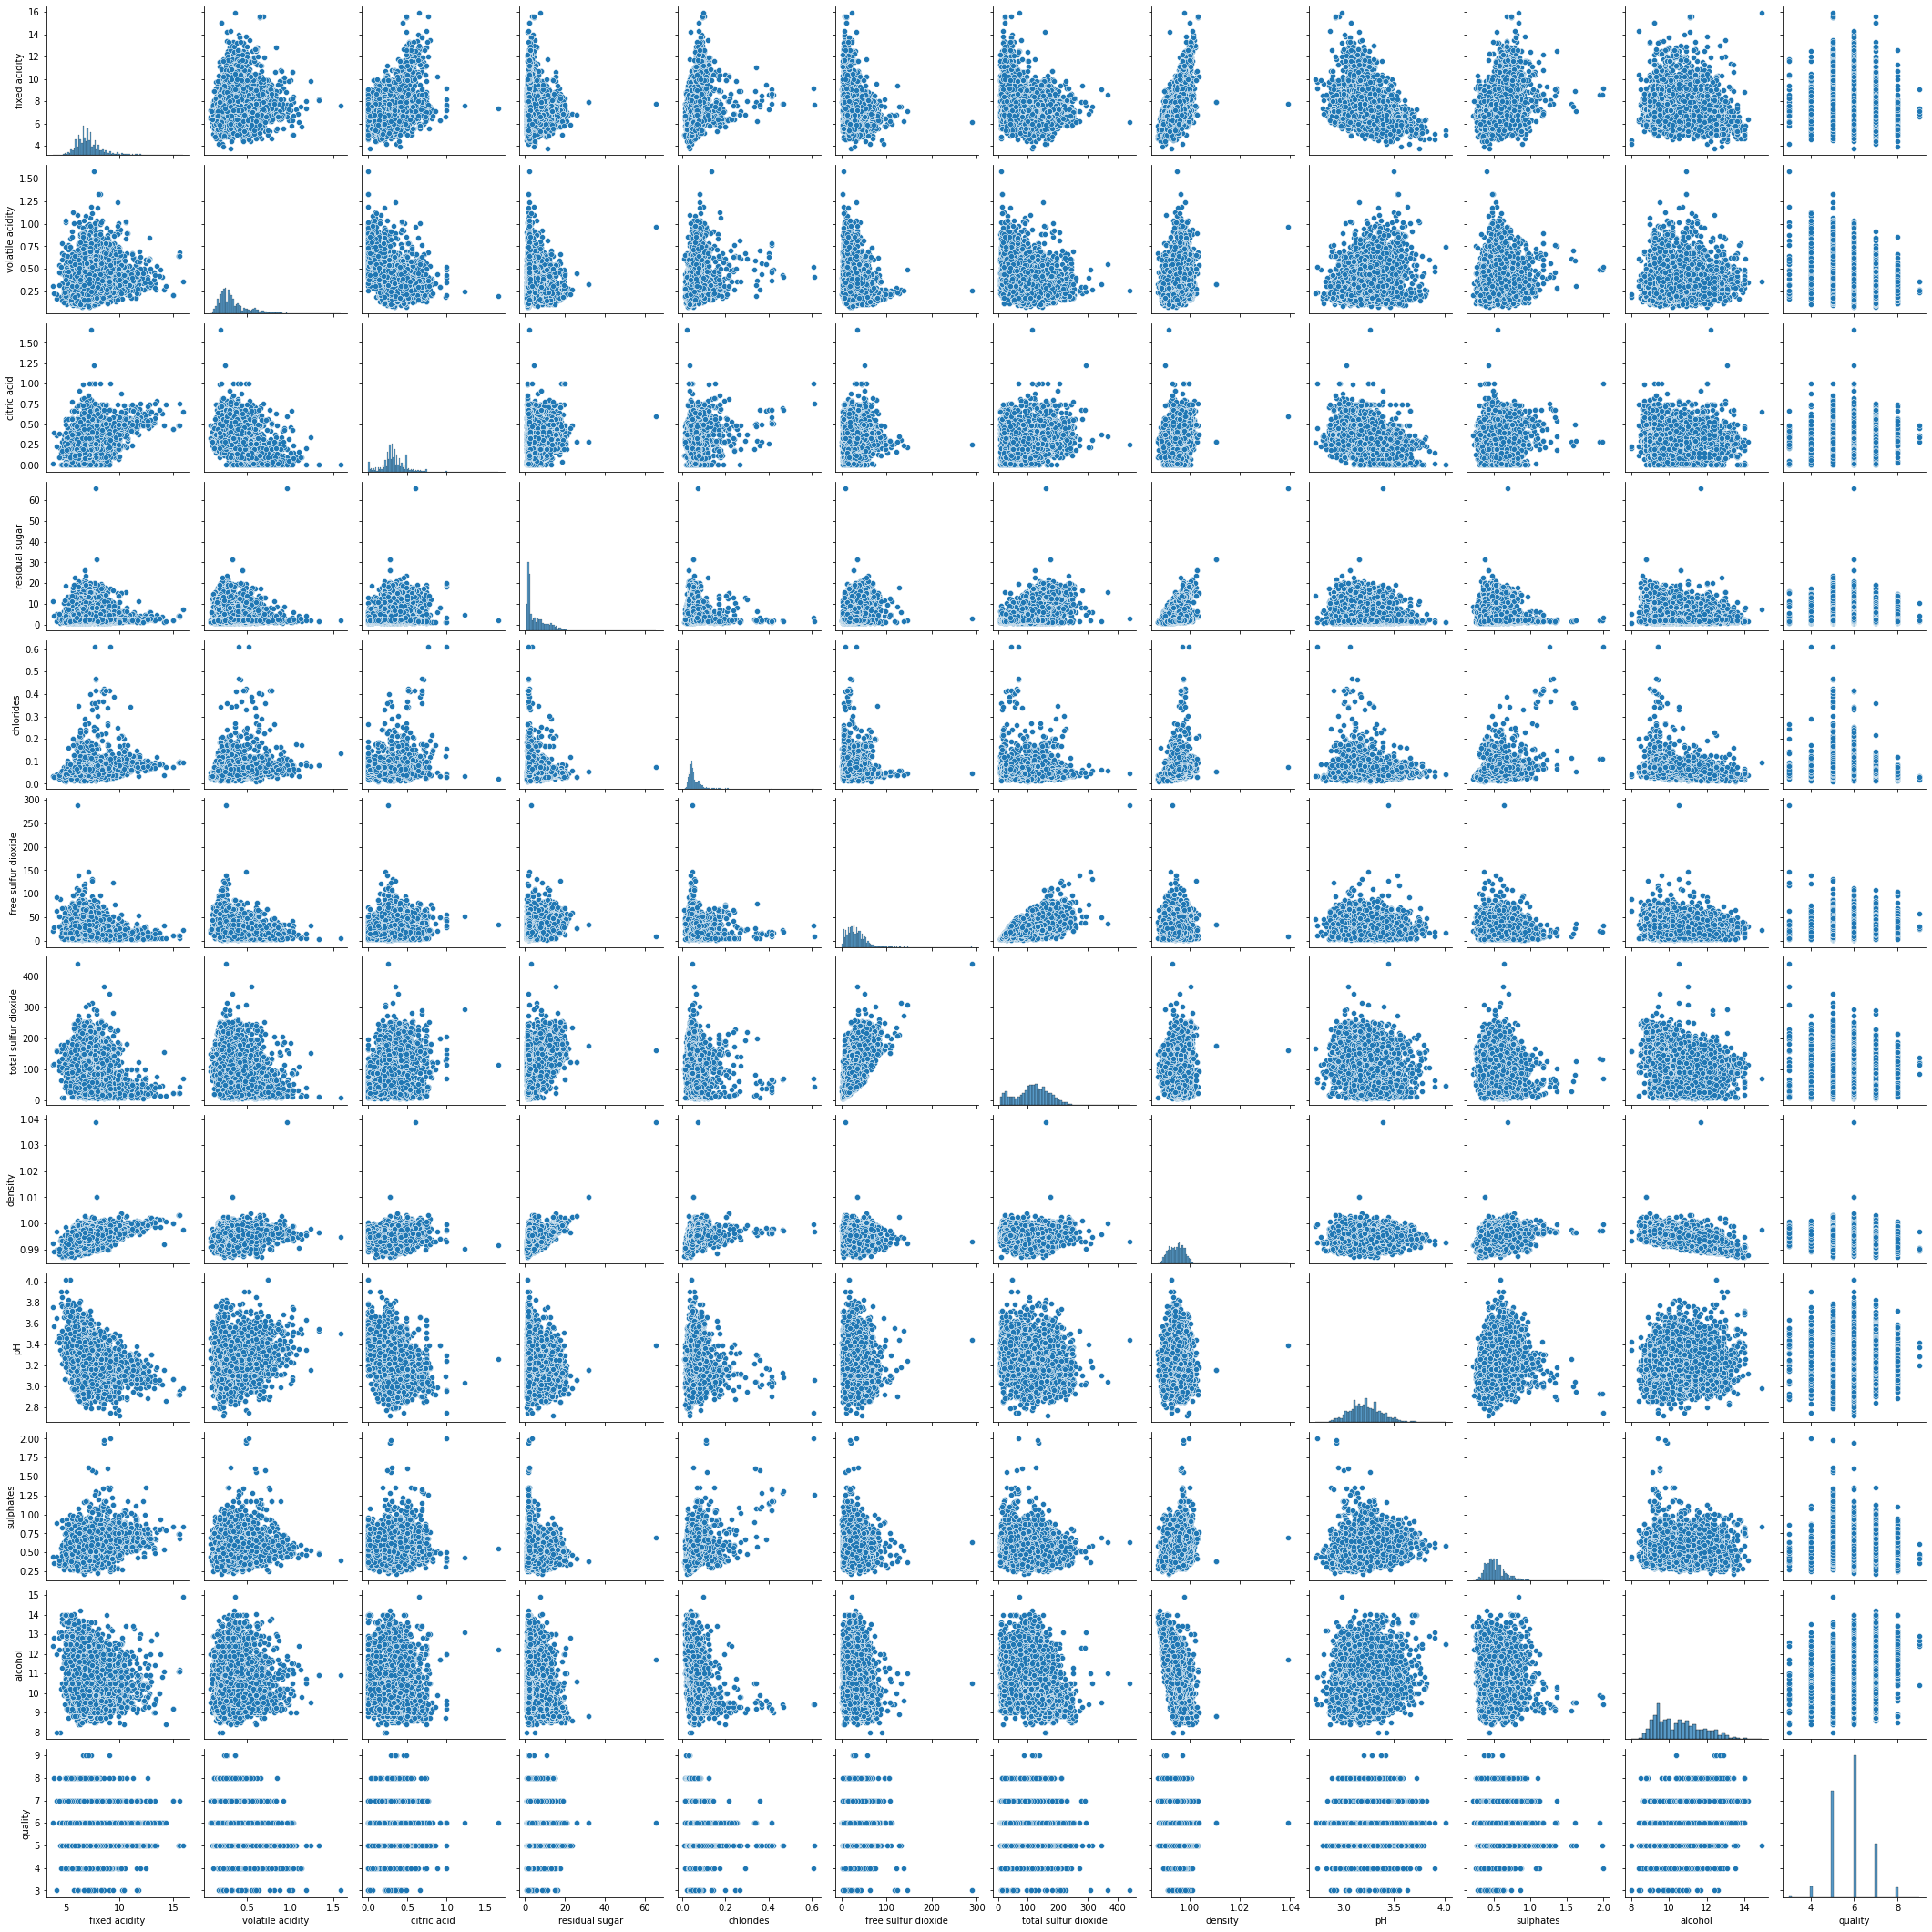

In [13]:
sb.pairplot(data=dataset)

In [14]:
dataset.groupby('type').size()

type
red      1599
white    4898
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

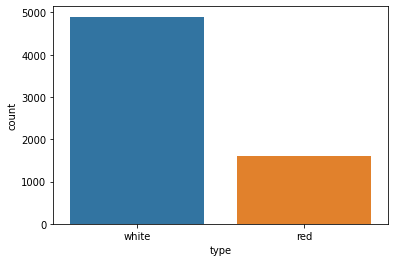

In [15]:
sb.countplot(x='type', data=dataset)

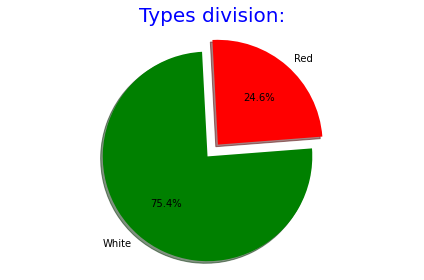

In [16]:
labels = ['White', 'Red'] 
pie_x = 4898
pie_y = 1599
sizes = [pie_x,pie_y] 
explode = (0, 0.15) 
col_pie = ["green","red"] 
fig1, ax1 = pyplot.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
pyplot.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
pyplot.tight_layout()
pyplot.show()

<AxesSubplot:>

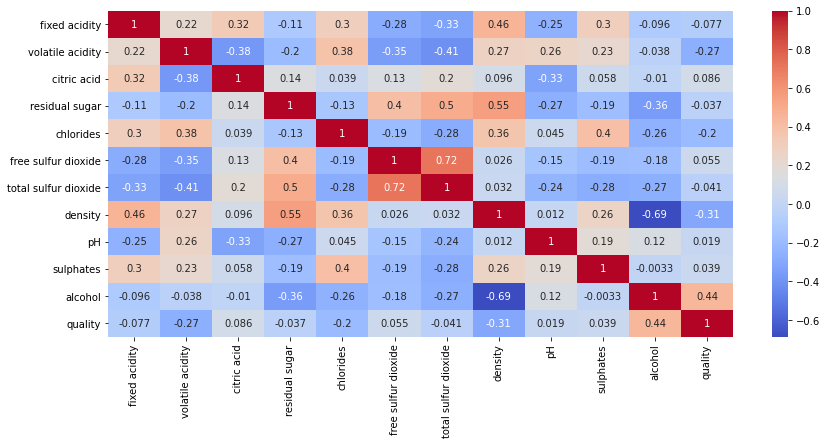

In [17]:
pyplot.figure(figsize=[14,6])
sb.heatmap(dataset.corr(), annot = True,cmap = 'coolwarm')

<AxesSubplot:xlabel='quality', ylabel='count'>

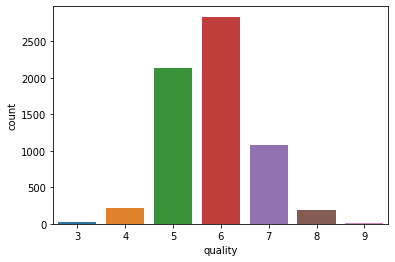

In [18]:
sb.countplot(x='quality', data=dataset)

# Validation Dataset

In [19]:
data = pd.get_dummies(dataset,drop_first=True)
data.head(20)
# 1 : White
# 0 : Red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.200000,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.100000,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.200000,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.000000,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.300000,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.100000,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [20]:
X = data.values[:, 0:12]
Y = data.values[:, 12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state =7)

# Evaluate Algorithms: Baseline

In [21]:
models = [('LR', LogisticRegression(solver='lbfgs', max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC())]

In [22]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.984033 (0.006987)
LDA: 0.994806 (0.003552)
KNN: 0.942850 (0.010412)
CART: 0.985377 (0.003238)
NB: 0.972099 (0.009313)
SVM: 0.935347 (0.006951)


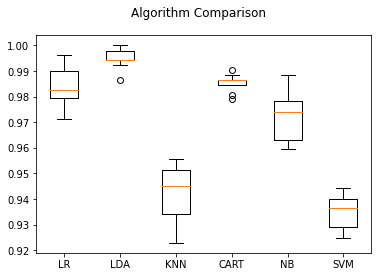

In [23]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms: Standardize Data

In [24]:
pipelines = [('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR',
                                                                   LogisticRegression())])),
             ('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA',
                                                                    LinearDiscriminantAnalysis())])),
             ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN',
                                                                    KNeighborsClassifier())])),
             ('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART',
                                                                     DecisionTreeClassifier())])),
             ('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB',
                                                                   GaussianNB())])),
             ('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())]))]

In [25]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.992689 (0.003731)
ScaledLDA: 0.994806 (0.003552)
ScaledKNN: 0.992497 (0.004078)
ScaledCART: 0.986148 (0.005689)
ScaledNB: 0.974794 (0.008533)
ScaledSVM: 0.995768 (0.003196)


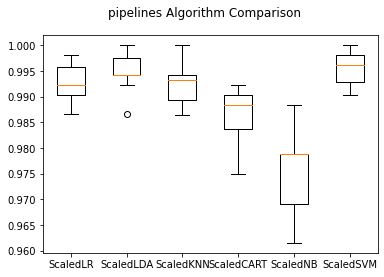

In [26]:
fig = pyplot.figure()
fig.suptitle('pipelines Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Algorithm Tuning

In [27]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996152 using {'C': 1.7, 'kernel': 'rbf'}
0.993844 (0.003828) with: {'C': 0.1, 'kernel': 'linear'}
0.974989 (0.005630) with: {'C': 0.1, 'kernel': 'poly'}
0.992881 (0.003340) with: {'C': 0.1, 'kernel': 'rbf'}
0.974987 (0.014105) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.994421 (0.003793) with: {'C': 0.3, 'kernel': 'linear'}
0.987302 (0.004227) with: {'C': 0.3, 'kernel': 'poly'}
0.994805 (0.002727) with: {'C': 0.3, 'kernel': 'rbf'}
0.967289 (0.011053) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.994998 (0.003670) with: {'C': 0.5, 'kernel': 'linear'}
0.991342 (0.005032) with: {'C': 0.5, 'kernel': 'poly'}
0.995190 (0.003132) with: {'C': 0.5, 'kernel': 'rbf'}
0.961518 (0.009994) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.994998 (0.003961) with: {'C': 0.7, 'kernel': 'linear'}
0.993074 (0.004647) with: {'C': 0.7, 'kernel': 'poly'}
0.995575 (0.003447) with: {'C': 0.7, 'kernel': 'rbf'}
0.966903 (0.011828) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.994998 (0.003961) with: {'C': 0.9, 'kernel': 'linear'

# Ensemble Methods

In [28]:
ensembles = [('AB', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RF', RandomForestClassifier()),
             ('ET', ExtraTreesClassifier())]

In [29]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.993459 (0.004567)
GBM: 0.993844 (0.004452)
RF: 0.994421 (0.005472)
ET: 0.996729 (0.003340)


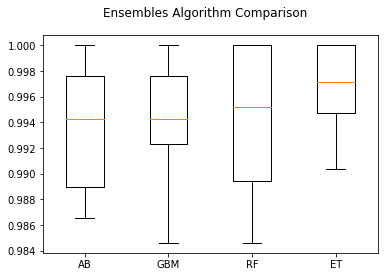

In [30]:
fig = pyplot.figure()
fig.suptitle('Ensembles Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Finalize Model

0.9969230769230769
[[355   3]
 [  1 941]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       358
         1.0       1.00      1.00      1.00       942

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



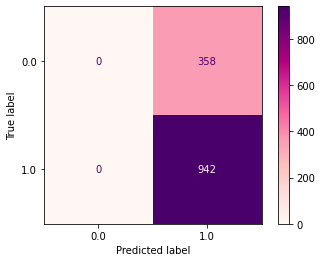

In [31]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.7)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
plot_confusion_matrix(model, X_validation, Y_validation,cmap="RdPu")
pyplot.show()